## Chronic Kidney Disease Dataset analysis

This notebook analyzes dataset obtained from patients diagnosed with Chronic Kidney Diease (CKD). The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

Source: https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis

Contributors: Adithya Hadidi, Kateryna Skoropad, Zarrin Rasizadeh, Anjali Deshpande

In [73]:
# Import standard libraries in this section
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

## Data exploration

In [74]:
df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")

df

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,8.602873,5.239288,0,0,0,0,0,130,89,195.433613,7.309465,2.191402,23.207131,80.644448,2.926489,240.575604,137.142172,5.277706,9.867489,3.177054,14.331815,184.518899,133.107066,30.859157,320.668245,1,1,5.408175,0,0,0,6.973771,1.541242,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,9.836919,6.401662,0,0,0,0,0,127,103,73.606489,4.357399,0.584633,27.145254,118.026779,3.496617,207.392143,136.744038,3.883738,9.411840,2.626317,11.397473,253.709988,131.987735,27.157762,334.818155,0,0,3.229984,1,0,1,0.465757,4.224176,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,5.038194,8.440859,0,0,0,0,0,118,102,163.084321,8.235078,0.527432,29.733737,19.283249,3.549633,105.821102,143.887896,4.051049,8.705635,4.246865,16.727631,221.399305,183.307380,51.888571,162.784996,0,1,8.367022,0,0,0,4.537944,6.061171,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,4.557577,5.527100,0,0,0,0,0,163,87,98.794331,

In [75]:
df.shape

(1659, 54)

## 1. Data Cleaning and Preprocessing

Drop *PatientID* and *DoctorInCharge* columns since they don't provide any information. 

In [76]:
# Display the summary statistics of the dataset
df = df.drop(['PatientID', 'DoctorInCharge'], axis = 1)


In [77]:
## More code to be adde here (maybe)

## 2. Univariate Analysis

(Source: https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/)

Display summary statistics for numerical and categorical columns

Display each feature with its count, mean, std deviation, min, max and 25%, 50%, 75% percentiles indicating the distribution of values.

In [78]:

# Display all columns 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.width', None)  # None means unlimited width
print(df.describe(include='all'))


               Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.00000          1659.000000   
mean     54.441230     0.515371     0.71308             0.977697   
std      20.549757     0.499914     1.00043             0.776686   
min      20.000000     0.000000     0.00000             0.000000   
25%      36.000000     0.000000     0.00000             0.000000   
50%      54.000000     1.000000     0.00000             1.000000   
75%      72.000000     1.000000     1.00000             2.000000   
max      90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670     0.455252            5.798787   
min          0.000000    15.033888     0.000000            0.021740   
25%          1.000000    21.4714

For the numerical variables, visualizing distributions using histograms, box plots, or density plots to understand the spread and skewness of data.

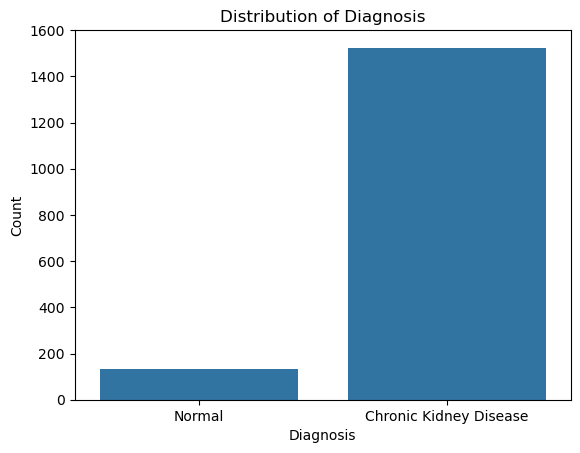

In [83]:
# Add code for histogram showing 'Diagnosis' as x-axis and count as y-axis
# Visualize the distribution of target classes
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[1, 0], labels=['Chronic Kidney Disease', 'Normal'])
plt.show()

The dataset contains large number of clinical measurements. For simplicity, lets just take 'GFR' and 'ProteinInUrine' to draw a scatter plot

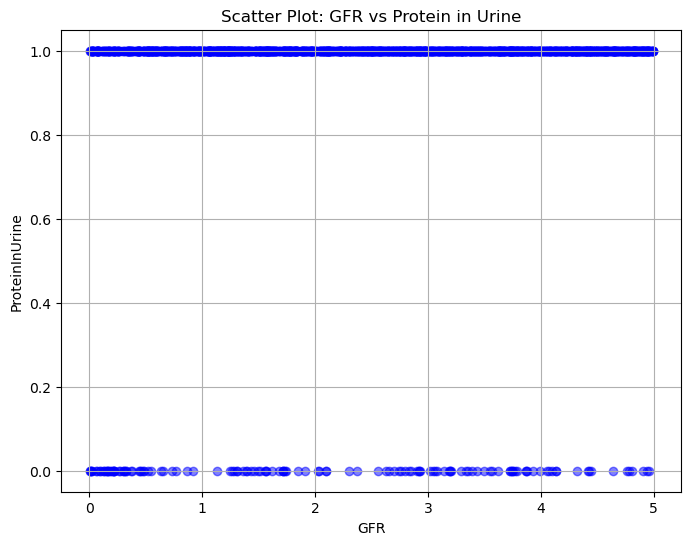

In [97]:
# Add code for scatter plot

plt.figure(figsize=(8, 6))
plt.scatter(df['ProteinInUrine'], df['Diagnosis'], c=['blue'], alpha=0.5)
plt.title('Scatter Plot: GFR vs Protein in Urine')
plt.xlabel('GFR')
plt.ylabel('ProteinInUrine')
plt.grid(True)
plt.show()
### To be done

Scatterplot showing 'GFR' and 'SerumCreatinine'

In [81]:
# Add code for scatter plot
### To be done


For categorical variables, creating frequency tables and bar charts to examine the distribution of categorical variables such as Gender, Ethnicity, Education Level, Smoking status, etc.

In [82]:
# Add code for frequency tables and barcharts
### To be assigned